In [61]:
import numpy as np
import matplotlib.pyplot as plt

def plot_band(ax, xarray, yarray, phase_lower, phase_higher,
              arrow=False, arrow_pos=0, hatch='', double=False):
    # Main curve
    ax.plot(xarray, yarray, color="black", linewidth=1, label=r'$\epsilon_k$')

    # Fills
    ax.fill_between(
        xarray, np.clip(yarray, phase_higher, 1), 1,
        facecolor="#f2f0f0", alpha=0.5,
        hatch=hatch, edgecolor="gray", linewidth=0.0,
        label="Empty"
    )
    ax.fill_between(
        xarray, np.clip(yarray, phase_lower, phase_higher), phase_higher,
        alpha=0.4, color="#fff0ab",
        where=(yarray <= phase_higher),
        label="Singly Occupied"
    )
    ax.fill_between(
        xarray, np.clip(yarray, -1, phase_lower), phase_lower,
        alpha=0.5, color="#bdffe6",
        where=(yarray <= phase_lower),
        label="Doubly Occupied"
    )

    # Horizontal dashed lines
    ax.hlines(phase_higher, -np.arccos(-phase_higher), np.arccos(-phase_higher),
              colors="black", linestyles="dashed", linewidth=1)
    ax.hlines(phase_lower, -np.arccos(-phase_lower), np.arccos(-phase_lower),
              colors="black", linestyles="dashed", linewidth=1)

    # Optional arrow
    if arrow:
        ax.annotate(
            '', xy=(arrow_pos, phase_higher), xycoords='data',
            xytext=(arrow_pos, phase_lower), textcoords='data',
            arrowprops=dict(arrowstyle='<->', color='black', linewidth=1)
        )
        ax.text(arrow_pos + 0.1, (phase_lower + phase_higher)/2,
                r"$U$", va="center", ha="left")
        
    if double == True:
        ax.text(np.arccos(-phase_lower) + 0.1, phase_lower - 0.05,
                r'$\epsilon_{k_F}$', va="center", ha="left")
    else:
        if phase_lower != -1:    
            ax.text(np.arccos(-phase_lower) + 0.1, phase_lower,
                    r'$\epsilon_{k_0}$', va="center", ha="left")
        if phase_higher != 1:
            ax.text(np.arccos(-phase_higher) + 0.1, phase_higher,
                    r'$\epsilon_{k_1}$', va="center", ha="left")
        

    # Clean up axes
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    # Local legend: only the curve
    ax.legend(handles=[ax.get_lines()[0]],
              loc="lower left", frameon=False, markerfirst=True)


def plot_occupation_numbers(ax, k0, k1, klabels=False, double=False):
    k0 *= np.pi
    k1 *= np.pi
    x = np.linspace(-np.pi, np.pi, 5000)

    # Axes styling: x-axis through zero, no y-axis
    ax.spines["bottom"].set_position("zero")
    ax.spines["bottom"].set_color("black")
    ax.spines["bottom"].set_linewidth(1)

    ax.spines["left"].set_position("zero")
    ax.spines["left"].set_color("black")
    ax.spines["left"].set_linewidth(1)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    f = np.piecewise(
        x,
        [np.abs(x) < k0, (np.abs(x) >= k0) & (np.abs(x) < k1), np.abs(x) >= k1],
        [2, 1, 0]
    )

    line, = ax.plot(x, f, color="black", linewidth=1, label=r'$n_k$', zorder=2)

    # Fills
    mask = (x >= -k0) & (x <= k0)
    ax.fill_between(x[mask], 0, 2,
                    alpha=0.5, color="#bdffe6", label="Doubly Occupied")
    ax.fill_between(x, 0, 1,
                    alpha=0.4, color="#fff0ab", where=(f == 1),
                    label="Singly Occupied")
    ax.fill_between(x, 0.5, 0,
                    alpha=0.5, color="#f2f0f0", where=(f == 0),
                    label="Empty")

    # Local legend: only the curve
    ax.legend(handles=[line], loc="upper right", frameon=False)

    if klabels == True:
    # Axis ticks/labels:

        ax.set_xticks([-np.pi, -k1, -k0, k0, k1, np.pi])
        ax.set_xticklabels([r"$-\pi$", r"$-k_1$", r"$-k_0$",
                            r"$k_0$", r"$k_1$", r"$\pi$"])
        ax.set_yticks([1])
        ax.text(-0.2, 2.1, "2", ha="right", va="center",
                zorder=10, clip_on=False, transform=ax.transData)
        
        ax.vlines((-k0, k0), 0, 1, 'black', linestyles='dashed', linewidth=1)        
    else:
        """
        ax.set_xticks([-np.pi, np.pi])
        ax.set_xticklabels([r"$-\pi$", r"$\pi$"])
        """
        if k1 == np.pi:
            if k0 != 0:
                ax.set_yticks([1])
                ax.text(-0.2, 2.1, "2", ha="right", va="center",
                    zorder=10, clip_on=False, transform=ax.transData)
                ax.vlines((-k0, k0), 0, 1, 'black', linestyles='dashed', linewidth=1)
                ax.set_xticks([-np.pi,-k0, k0, np.pi])
                ax.set_xticklabels([r"$-\pi$", r"$-k_0$", r"$k_0$", r"$\pi$"])
            else:
                ax.set_yticks([2])
                ax.text(-0.2, 1.1, "1", ha="right", va="center",
                        zorder=10, clip_on=False, transform=ax.transData)
                ax.set_xticks([-np.pi, np.pi])
                ax.set_xticklabels([r"$-\pi$", r"$\pi$"])
        else:
            if k0 == 0:
                ax.set_xticks([-np.pi,-k1, k1, np.pi])
                ax.set_xticklabels([r"$-\pi$", r"$-k_1$", r"$k_1$", r"$\pi$"])
                ax.set_yticks([2])
                ax.text(-0.2, 1.1, "1", ha="right", va="center",
                    zorder=10, clip_on=False, transform=ax.transData)
            else:
                ax.set_yticks([1])
                ax.text(-0.2, 2.1, "2", ha="right", va="center",
                    zorder=10, clip_on=False, transform=ax.transData)
                if k1 != k0:
                    ax.vlines((-k0, k0), 0, 1, 'black', linestyles='dashed', linewidth=1)
                    ax.set_xticks([-np.pi,-k0, k0, np.pi])
                    ax.set_xticklabels([r"$-\pi$", r"$-k_0$", r"$k_0$", r"$\pi$"])

    if double == True:
        ax.set_yticks([1])
        ax.text(-0.2, 2.1, "2", ha="right", va="center",
                zorder=10, clip_on=False, transform=ax.transData)
        ax.set_xticks([-np.pi,-k1, k1, np.pi])
        ax.set_xticklabels([r"$-\pi$", r"$-k_F$", r"$k_F$", r"$\pi$"])


    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(0, 2.2)



<>:119: SyntaxWarning: invalid escape sequence '\p'
<>:119: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1060719/3589183400.py:119: SyntaxWarning: invalid escape sequence '\p'
  """


In [53]:
def doubleplot(phase_lower, phase_higher, k0, k1, klabels=False, arrow=False, arrow_pos=0.8, double=False, save_title=''):
    plt.rcParams["text.usetex"] =True
    plt.rcParams["font.size"] = 12
    plt.rcParams["font.family"] = 'lmodern'
    
    # === Combined Figure ===
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.set_size_inches(6.377953, 2.73341)

    # Example inputs
    k = np.linspace(-np.pi, np.pi, 1000)
    eps_k = -np.cos(k)

    plot_band(axes[0], k, eps_k, phase_lower, phase_higher, arrow, arrow_pos, double=double)
    plot_occupation_numbers(axes[1], k0, k1, klabels, double=double)

    # Collect from both axes
    handles, labels = [], []
    for ax in axes:
        h, l = ax.get_legend_handles_labels()
        handles += h
        labels += l

    # Keep only occupation categories, and remove duplicates
    keep = ["Doubly Occupied", "Singly Occupied", "Empty"]
    handle_label_dict = {l: h for h, l in zip(handles, labels) if l in keep}

    # Global legend
    fig.legend(handle_label_dict.values(), handle_label_dict.keys(),
            loc="upper center", ncol=3, frameon=False)

    plt.tight_layout(rect=[0,0,1,0.9])

    if save_title != '':
        plt.savefig(save_title, dpi=1000, bbox_inches="tight")
        
    plt.show()

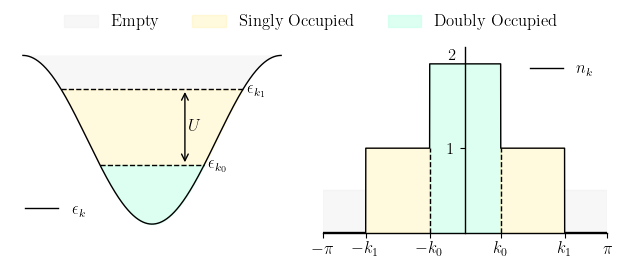

In [67]:
doubleplot(-0.3, 0.6, 0.25, 0.7, klabels=True, arrow=True, arrow_pos=0.8, save_title='Plots/p1_eps_nk.pdf')

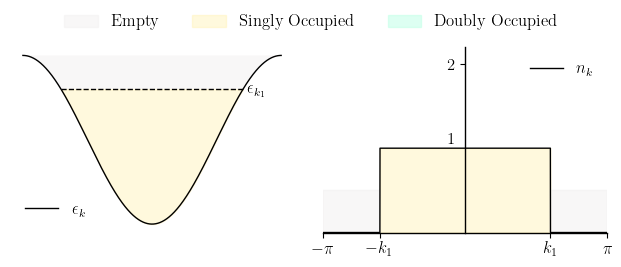

In [66]:
doubleplot(-1, 0.6, 0, 0.6, save_title='Plots/p2_eps_nk.pdf')

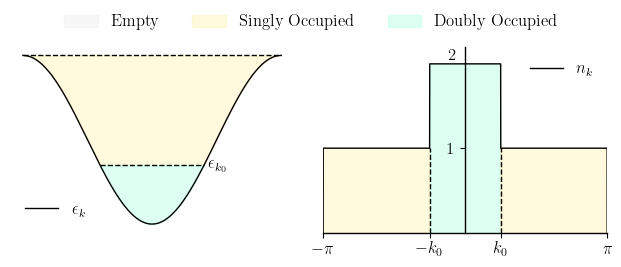

In [65]:
doubleplot(-0.3, 1, 0.25, 1, save_title='Plots/p3_eps_nk.pdf')

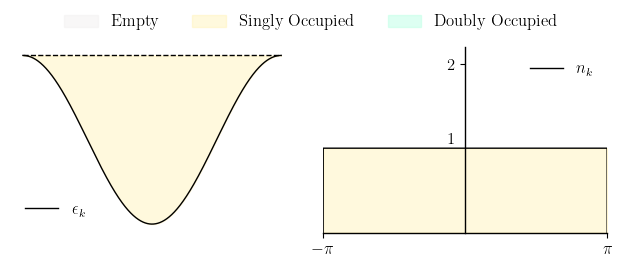

In [64]:
doubleplot(-1, 1, 0, 1, save_title='Plots/p4_eps_nk.pdf')

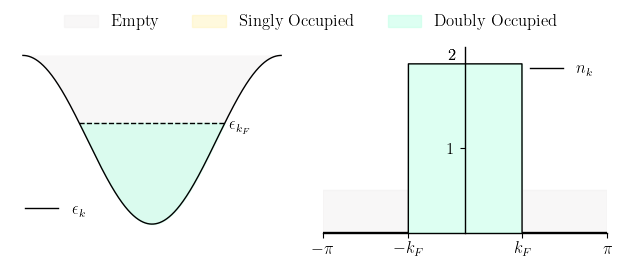

In [63]:
doubleplot(0.2, -1, 0.4, 0.4, double=True, save_title='Plots/attractive_eps_nk.pdf')

In [118]:
from matplotlib.ticker import MultipleLocator

plt.rcParams["text.usetex"] =True
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'lmodern'

def plot_schematic_pd(y_max, save_title=''):
    # Create the plot
    fig, ax = plt.subplots()

    fig.set_size_inches(6.377953 / 1.5, 2.73341 * 1.2)

    x1 = np.linspace(0, 1, 500)
    x2 = np.linspace(1, 2, 500)

    y1 = x1
    y2 = 2 - x2

    ax.plot(x1, y1, label=r'$U_c (\rho)$', color='black', linestyle='dashed', linewidth=1)
    ax.plot(x2, y2, color='black', linestyle='dashed', linewidth=1)

    ax.vlines(x=1, ymin=1, ymax=y_max, color='black', linestyle='-')

    ax.text(1, 0.4, 'I', ha='center')
    ax.text(0.4, 1.0, 'II', ha='center')
    ax.text(1.6, 1.0, 'III', ha='center')
    ax.text(1.2, 1.25, 'IV', ha='left', va='center')

    ax.annotate(
    '', 
    xy=(1.0, 1.25),    # arrowhead (end point)
    xytext=(1.2, 1.25),# tail (start point)
    arrowprops=dict(
        arrowstyle='->',   # simple one-sided arrow
        color='black',
        linewidth=1
    )
)

    # Labels and legend
    ax.set_xlabel(r'$\rho$')
    ax.set_ylabel(r'$U/W$', rotation=0, va='top')

    ax.legend(frameon=False, loc='upper left')

    ax.set_xlim(0, 2)
    ax.set_ylim(0, y_max)
    ax.tick_params(top=True, right=True, direction='in', pad=7)
    # Set major tick intervals
    ax.xaxis.set_major_locator(MultipleLocator(0.5))  # x-axis ticks every 0.2 units
    ax.yaxis.set_major_locator(MultipleLocator(0.5))  # y-axis ticks every 0.5 units

    if save_title != '':
        plt.savefig(save_title, dpi=1000, bbox_inches="tight")

    plt.show()

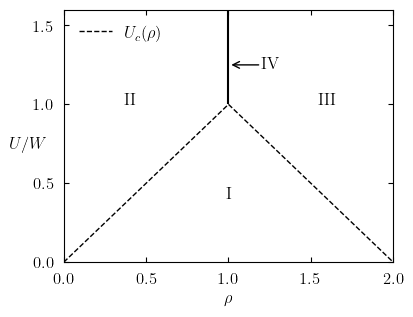

In [119]:
plot_schematic_pd(1.6, save_title='Plots/schematic_pd.pdf')